# Stance Visualization

Reproducing the work from https://github.com/uclmr/fakenewschallenge

1. Reproduce the training
2. Feed the BoW to t-SNE


In [1]:
# Import relevant packages and modules
from util import *
import time
import random
import keras
from sklearn.manifold import TSNE
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


In [11]:
# Initialise hyperparameters
rand_seed = 1
lim_unigram = 5000
train_keep_prob = 0.6
l2_alpha = 0.00001
learn_rate = 0.01
clip_ratio = 5
nnodes = 100
hidden_nodes = [nnodes, nnodes]
batch_size = 64
epochs = 20
reg_l2 = 0.00001
verbose = 1

In [5]:
# Set file names
file_train_instances = "./data/train_stances.csv"
file_train_bodies = "./data/train_bodies.csv"
file_test_instances = "./data/test_stances_unlabeled.csv"
file_test_bodies = "./data/test_bodies.csv"
file_predictions = 'predictions_test.csv'

In [6]:
dic = load_data(file_train_instances=file_train_instances
                ,file_train_bodies=file_train_bodies
                ,file_test_instances=file_test_instances
                ,file_test_bodies=file_test_bodies
                ,lim_unigram=lim_unigram
                ,random_seed = rand_seed)

Raw data loaded.... number of data points = 49972
Initial setup for training dataset complete....
Finished setting up training set. Number of train/dev/test data points = 39977/9995/25413


In [7]:
start = time.time()
t_sne = TSNE(n_components=2)
t_sne.set_params(n_components=2, perplexity=50.0, early_exaggeration=1.0
               , learning_rate=300.0, n_iter=500, n_iter_without_progress=100
               , min_grad_norm=1e-07
               , metric='euclidean', init='random', verbose=0
               , random_state=None, method='barnes_hut', angle=0.5)
npts = 2000
X_embedded = dic['train_x'][:npts,:]
Y_embedded = dic['train_y'][:npts,:].argmax(axis=1)
X_embedded = t_sne.fit_transform(X_embedded)
end = time.time()
print('Time spent = %f seconds' % (end-start))

Time spent = 65.915146 seconds


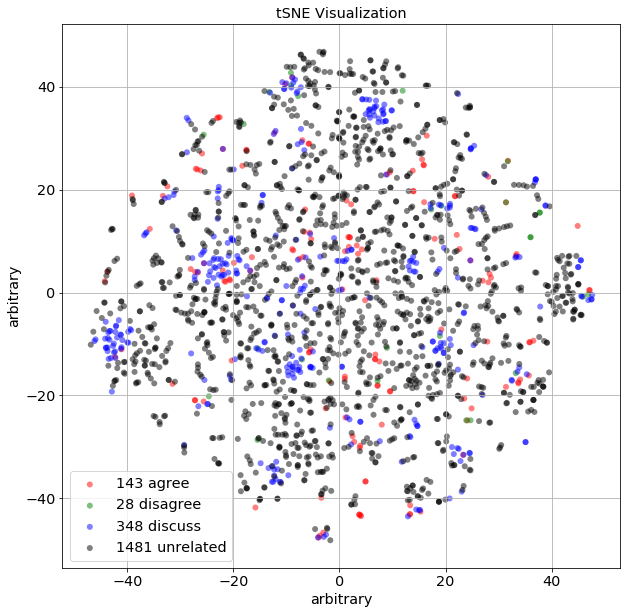

In [8]:
plot_tsne_scattering(X_embedded, Y_embedded, label_ref_rev, 'tSNE Visualization')


## Demonstration of a working model

After 10 epochs the instance classification already doing well....

In [13]:
train_x = dic['train_x']
train_y = dic['train_y']
dev_x = dic['dev_x']
dev_y = dic['dev_y']

model = set_model_NN(input_output_shape = (train_x.shape[1], train_y.shape[1]), 
                     hidden_nodes=hidden_nodes, 
                     activation='relu',
                     loss = 'categorical_crossentropy',
                     metrics = ['categorical_accuracy'],
                     initializer = 'glorot_normal',
                     reg_l2 = 0.01,
                     epsilon=1e-6)

In [14]:
start = time.time()
history = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, shuffle=True, 
                    validation_data=(dev_x, dev_y), verbose=verbose)
end = time.time()
print('Total time used for training = %d seconds' % (end-start))

Train on 39977 samples, validate on 9995 samples
Epoch 1/20
39977/39977 [==============================] - 22s - loss: 0.8138 - categorical_accuracy: 0.9021 - val_loss: 0.5018 - val_categorical_accuracy: 0.9338
Epoch 2/20
39977/39977 [==============================] - 21s - loss: 0.4181 - categorical_accuracy: 0.9298 - val_loss: 0.4140 - val_categorical_accuracy: 0.9269
Epoch 3/20
39977/39977 [==============================] - 21s - loss: 0.4001 - categorical_accuracy: 0.9311 - val_loss: 0.3757 - val_categorical_accuracy: 0.9368
Epoch 4/20
39977/39977 [==============================] - 21s - loss: 0.3898 - categorical_accuracy: 0.9322 - val_loss: 0.3777 - val_categorical_accuracy: 0.9343
Epoch 5/20
39977/39977 [==============================] - 21s - loss: 0.3760 - categorical_accuracy: 0.9366 - val_loss: 0.3787 - val_categorical_accuracy: 0.9368
Epoch 6/20
39977/39977 [==============================] - 21s - loss: 0.3668 - categorical_accuracy: 0.9379 - val_loss: 0.3609 - val_categori